# Stock Price Prediction using LSTM Neural Networks

This notebook demonstrates stock price prediction using Long Short-Term Memory (LSTM) neural networks. The project includes:

- Data acquisition from Kaggle's stock market dataset
- Data preprocessing and feature engineering
- Implementation of basic and advanced LSTM models
- Model evaluation and visualization of predictions

## Requirements
- Python 3.7+
- TensorFlow/Keras
- Pandas, NumPy, Matplotlib, Scikit-learn
- Kaggle API (for data download)

## Dataset
The project uses the Stock Market Dataset from Kaggle, which contains historical stock price data for various companies.

In [4]:
!kaggle datasets download jacksoncrow/stock-market-dataset


Dataset URL: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset
License(s): CC0-1.0
 98% 514M/522M [00:01<00:00, 280MB/s]
100% 522M/522M [00:03<00:00, 157MB/s]


## Data Acquisition

First, we'll download the stock market dataset from Kaggle and extract it to our working directory.

In [5]:
!unzip -q stock-market-dataset.zip -d stock_data


In [6]:
!ls stock_data


etfs  stocks  symbols_valid_meta.csv


In [9]:
import pandas as pd

df = pd.read_csv('stock_data/stocks/A.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200


In [10]:
import pandas as pd

meta = pd.read_csv('stock_data/symbols_valid_meta.csv')
print(meta.head())

stock_sample = pd.read_csv('stock_data/stocks/AAPL.csv')
print(stock_sample.head())


  Nasdaq Traded Symbol                                      Security Name  \
0             Y      A            Agilent Technologies, Inc. Common Stock   
1             Y     AA                    Alcoa Corporation Common Stock    
2             Y   AAAU                       Perth Mint Physical Gold ETF   
3             Y   AACG  ATA Creativity Global - American Depositary Sh...   
4             Y   AADR                AdvisorShares Dorsey Wright ADR ETF   

  Listing Exchange Market Category ETF  Round Lot Size Test Issue  \
0                N                   N           100.0          N   
1                N                   N           100.0          N   
2                P                   Y           100.0          N   
3                Q               G   N           100.0          N   
4                P                   Y           100.0          N   

  Financial Status CQS Symbol NASDAQ Symbol NextShares  
0              NaN          A             A          N  
1       

In [13]:
import os
import pandas as pd

stocks_path = '/content/stock_data/stocks'

csv_files = [f for f in os.listdir(stocks_path) if f.endswith('.csv')]
print(f"Total stock CSV files: {len(csv_files)}")
print("Sample files:", csv_files[:5])


Total stock CSV files: 5884
Sample files: ['NEX.csv', 'NR.csv', 'TEUM.csv', 'GTHX.csv', 'ERIC.csv']


In [14]:
sample_file = 'AAPL.csv'
sample_path = os.path.join(stocks_path, sample_file)

df = pd.read_csv(sample_path)
print(f"Loaded {sample_file}. Shape: {df.shape}")

df.head()


Loaded AAPL.csv. Shape: (9909, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [ ]:
import os
import pandas as pd

# Use relative path that works across different environments
stocks_path = 'stock_data/stocks'

if os.path.exists(stocks_path):
    csv_files = [f for f in os.listdir(stocks_path) if f.endswith('.csv')]
    print(f"Total stock CSV files: {len(csv_files)}")
    print("Sample files:", csv_files[:5])
else:
    print(f"Directory {stocks_path} not found. Please ensure data is downloaded and extracted.")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [16]:
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [17]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


## Data Exploration and Visualization

Let's explore the structure and characteristics of our stock price data.

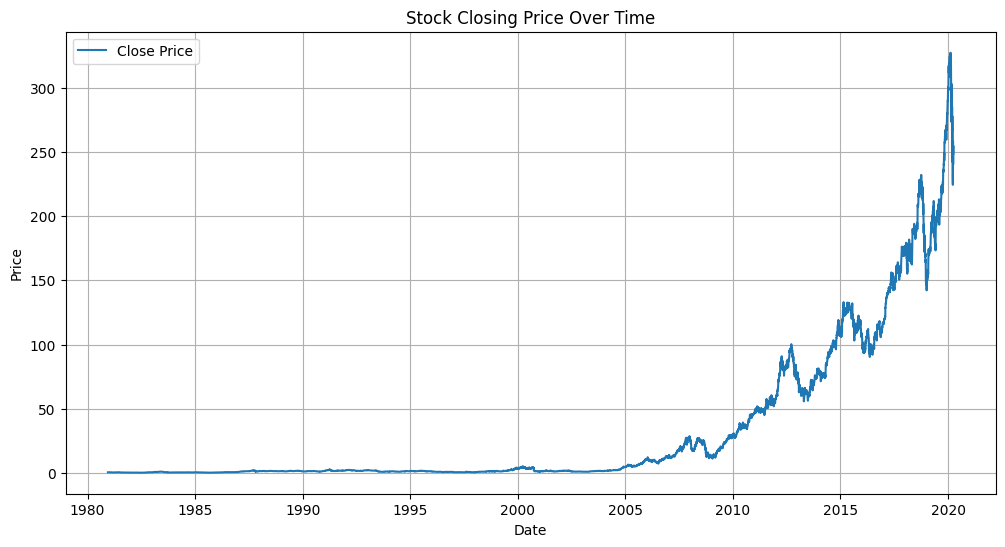

In [18]:
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use  the 'Close' column for now
close_prices = df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

print("Scaled data shape:", scaled_data.shape)


Scaled data shape: (9909, 1)


## Data Preprocessing

Before training our LSTM model, we need to normalize the data and create sequences for time series prediction.

In [21]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Sequence length (lookback window)
sequence_length = 60

X, y = create_sequences(scaled_data, sequence_length)

X = X.reshape((X.shape[0], X.shape[1], 1))

print("Input shape for LSTM:", X.shape)


Input shape for LSTM: (9849, 60, 1)


In [22]:
split_idx = int(0.8 * X.shape[0])

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


X_train: (7879, 60, 1) y_train: (7879,)
X_test: (1970, 60, 1) y_test: (1970,)


## Model Building and Training

### Basic LSTM Model

We'll start with a simple LSTM model for stock price prediction.

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - loss: 5.6263e-05 - val_loss: 8.7531e-05
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 4.8559e-06 - val_loss: 5.4798e-05
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 6.8326e-06 - val_loss: 6.7226e-05
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 4.9262e-06 - val_loss: 2.1413e-04
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 4.5332e-06 - val_loss: 1.3983e-04
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 4.1003e-06 - val_loss: 2.6800e-05
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 4.6569e-06 - val_loss: 5.5962e-05
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 4.3138e-06 - val_loss: 1.8324e-05
Epoch 9/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - loss: 4.0990e-06 - val_loss: 4.4301e-05
Epoch 10/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 3.8974e-06 - val_loss: 2.1779e-05
Epoch 11/20
222/222 ━━━━━━━━━━━━━━━━━━━

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
Test RMSE (en unités de prix) : 16.84


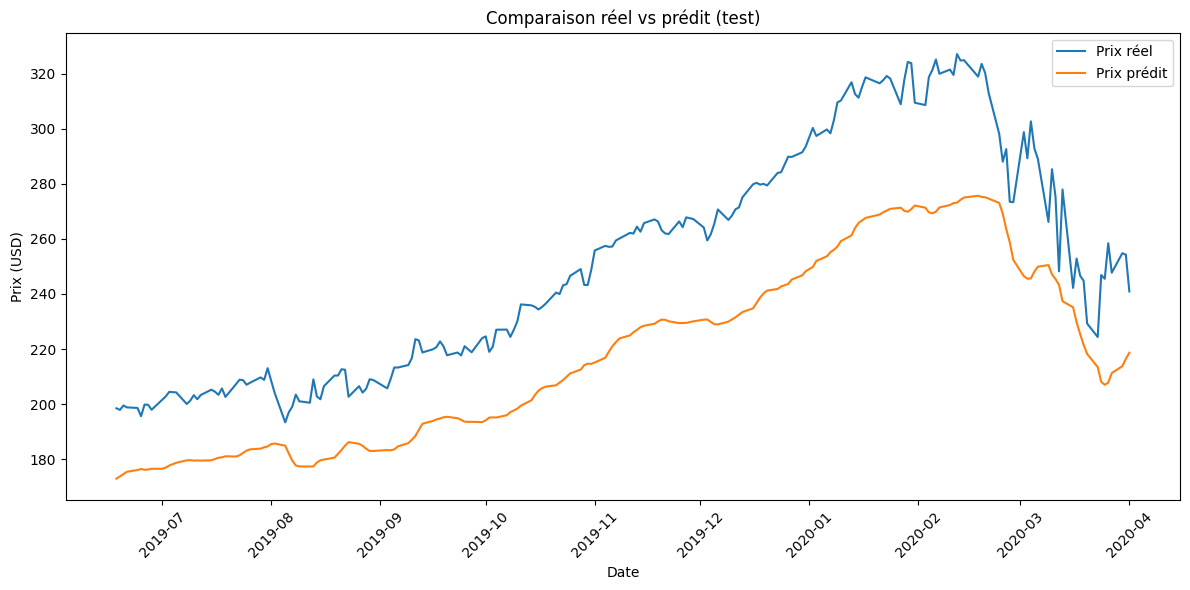

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

y_pred_scaled = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Test RMSE (en unités de prix) : {rmse:.2f}")

PLOT_LEN = min(200, len(y_true))
dates_test = df['Date'].values[sequence_length + split_idx : sequence_length + split_idx + len(y_true)]

plt.figure(figsize=(12, 6))
plt.plot(dates_test[-PLOT_LEN:], y_true[-PLOT_LEN:], label='Prix réel')
plt.plot(dates_test[-PLOT_LEN:], y_pred[-PLOT_LEN:], label='Prix prédit')
plt.title('Comparaison réel vs prédit (test)')
plt.xlabel('Date')
plt.ylabel('Prix (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Advanced LSTM Model

Now let's implement a more complex model using bidirectional LSTM, GRU layers, and learning rate scheduling.

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dropout, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

model1 = Sequential([
    Bidirectional(
        LSTM(100, return_sequences=True),
        input_shape=(X_train.shape[1], X_train.shape[2])
    ),
    Dropout(0.3),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    GRU(64, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model1.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

history = model1.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr],
    verbose=1
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 71s 251ms/step - loss: 2.6795e-04 - val_loss: 9.1374e-04 - learning_rate: 0.0010
Epoch 2/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 53s 214ms/step - loss: 5.6323e-05 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 3/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 85s 227ms/step - loss: 5.6520e-05 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 4/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 55s 221ms/step - loss: 4.6980e-05 - val_loss: 1.7776e-04 - learning_rate: 0.0010
Epoch 5/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 86s 238ms/step - loss: 4.3216e-05 - val_loss: 0.0039 - learning_rate: 0.0010


In [27]:
train_loss1 = model1.evaluate(X_train, y_train)
test_loss1 = model1.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss1}, Test Loss: {test_loss1}')

247/247 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - loss: 2.4599e-06
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0017
Train Loss: 4.0758382965577766e-05, Test Loss: 0.0039005810394883156


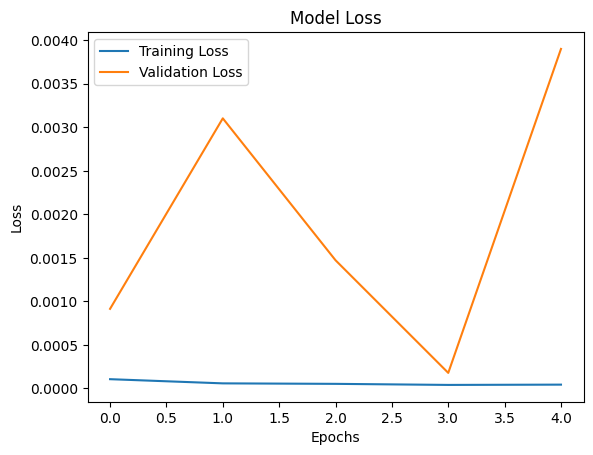

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

247/247 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


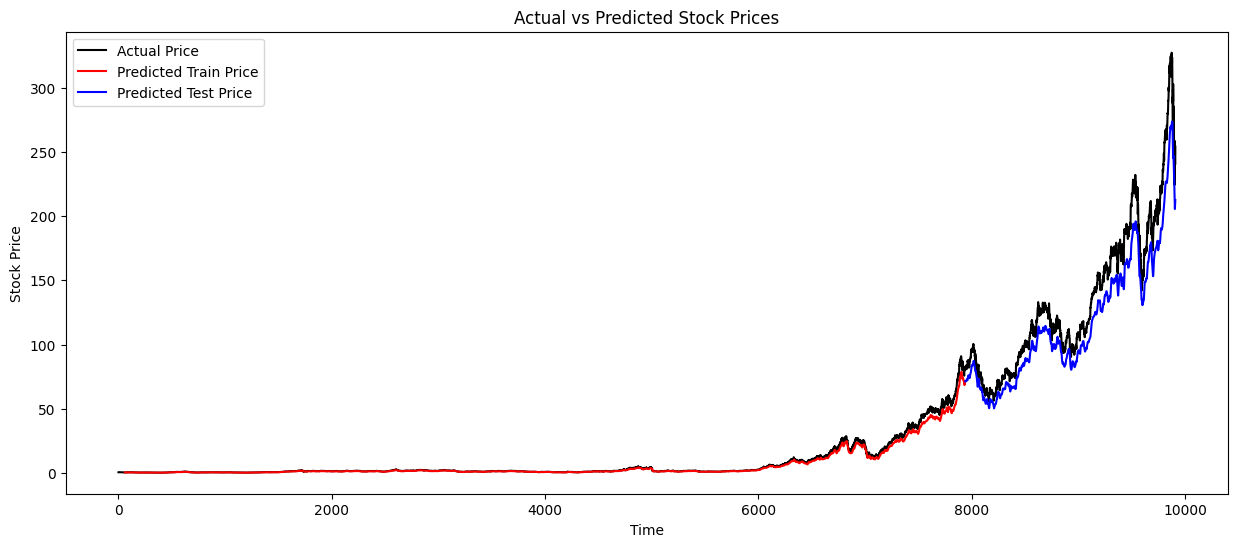

In [30]:
train_predict1 = model1.predict(X_train)
test_predict1 = model1.predict(X_test)

train_predict1 = scaler.inverse_transform(train_predict1)
test_predict1 = scaler.inverse_transform(test_predict1)

original_prices = df['Close'].values

import numpy as np

look_back = sequence_length  #  60
train_plot = np.empty_like(original_prices)
train_plot[:] = np.nan

test_plot = np.empty_like(original_prices)
test_plot[:] = np.nan


train_plot[look_back : look_back + len(train_predict1)] = train_predict1.flatten()


test_start = len(original_prices) - len(test_predict1)
test_plot[test_start : test_start + len(test_predict1)] = test_predict1.flatten()

#  Plot actual vs. predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(original_prices, color='black', label='Actual Price')
plt.plot(train_plot, color='red', label='Predicted Train Price')
plt.plot(test_plot, color='blue', label='Predicted Test Price')

plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


## Model Comparison and Final Results

Let's visualize the performance of our advanced model across the entire dataset.

## Conclusion

This notebook demonstrated the implementation of LSTM neural networks for stock price prediction. Key findings:

1. **Data preprocessing** is crucial for time series prediction
2. **Advanced architectures** (Bidirectional LSTM + GRU) can improve performance
3. **Proper validation** helps prevent overfitting
4. **Visualization** is essential for understanding model performance

### Next Steps
- Experiment with different sequence lengths
- Try other features (volume, technical indicators)
- Implement ensemble methods
- Add more sophisticated evaluation metrics

### Disclaimer
This is for educational purposes only. Stock prediction models should not be used for actual trading decisions without proper risk management and validation.